# Comparing Jesse's previous output to new program output

In [52]:
import random as rand
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)

In [53]:
def plot_spec(SPECTRA, COLOR):
    plt.vlines(SPECTRA.columns, np.repeat(0, len(SPECTRA.columns)), SPECTRA, colors=COLOR)

In [54]:
def plot_line(v, m):
    plt.hlines(y=0.7,xmin=0,xmax=m,colors='red')

In [77]:
jesse_df = pd.read_csv('Data/MSPLIToutput_cantRead.txt', sep='\t')
caleb_df = pd.read_csv('Data/fullOutput_lib31_match3_ppm10_sqrt.csv')

var1 = '#shared'
var2 = 'shared'
#var1 = 'cosine'
#var2 = 'cosine'


jesse_df['ID'] = list(zip(jesse_df['Scan#'].tolist(),jesse_df['Peptide'].tolist()))
jesse_df = jesse_df.loc[:, jesse_df.columns.intersection(['ID',var1])]
jesse_dict = jesse_df.set_index('ID')[var1].to_dict()

caleb_df['ID'] = list(zip(caleb_df['scan'].tolist(),caleb_df['peptide'].tolist()))
#caleb_df = caleb_df.drop_duplicates(subset='peptide', keep='first')
#caleb_df = caleb_df.reset_index(drop=True)
caleb_df = caleb_df[caleb_df['shared'] >= 15].reset_index(drop=True)

caleb_df = caleb_df.loc[:, caleb_df.columns.intersection(['ID',var2])]
caleb_df_high = caleb_df.drop(caleb_df[caleb_df[var2] < 0.91].index) 
caleb_df_low = caleb_df.drop(caleb_df[caleb_df[var2] >= 0.7].index) 

caleb_dict_high = caleb_df_high.set_index('ID')[var2].to_dict()
caleb_dict_low = caleb_df_low.set_index('ID')[var2].to_dict()

In [78]:
len(jesse_dict.keys())

7077

In [79]:
len(caleb_dict_high.keys())

12853

In [80]:
len(caleb_dict_low.keys())

0

## Intersect between Jesse's data and Caleb's data (0.7 and higher)

In [59]:
intersection = sorted(list(set(jesse_dict.keys()) & set(caleb_dict_high.keys())))
len(intersection)

3238

In [60]:
jesse_intersect = pd.DataFrame([[jesse_dict[k] for k in intersection]])
caleb_intersect = pd.DataFrame([[caleb_dict_high[k] for k in intersection]])
diff_intersect = pd.DataFrame([[abs(caleb_dict_high[k]-jesse_dict[k]) for k in intersection]])
compare = pd.DataFrame([[caleb_dict_high[k] for k in intersection],[jesse_dict[k] for k in intersection],intersection])
compare

0                   1                  2  \
0                  20                  21                 15   
1                  16                  22                 20   
2  (159, GSGTAEVELKK)  (160, GSGTAEVELKK)  (166, SIGVSNFNHR)   

                   3                    4                      5  \
0                 15                   16                     21   
1                 16                   19                     23   
2  (169, LLLQVQHASK)  (250, VTVLFAGQHISK)  (258, VLQATVVAVGSGSK)   

                     6                     7                    8  \
0                   17                    20                   18   
1                   18                    18                   19   
2  (261, SLDMDSIIAEVK)  (281, VGGTSDVEVNEKK)  (288, VTLTSEEEARLK)   

                      9                    10                    11  \
0                    15                    17                    15   
1                    16                    25                    17   
2  (294, GVDEATIIDILTK)  (318, ANLPQSFQVDTSK)  (329, TVLIMELINNVAK)   

                     12                    13                    14  \
0                    23                    25                    19   
1                    16                    21                    19   
2  (330, ILTFDQLALDSPK)  (331, ILTFDQLALDSPK)  (331, IYVDDGLISLQVK)   

                     15                     16                    17  \
0                    21                     16                    17   
1                    24                     19                    17   
2  (332, IYVDDGLISLQVK)  (340, VDEAVAVLQAHQAK)  (347, IIDSLFNTVTDKK)   

                    18                    19                      20  \
0                   15                    15                      15   
1                   19                    13                      16   
2  (353, FFEVILIDPFHK)  (354, TVQSLEIDLDSMR)  (359, LTSFIGAIAIGDLVK)   

                      21                     22                     23  \
0                     26                     25                     21   
1                     27                     27                     27   
2  (371, GVDEVTIVNILTNR)  (372, GVDEVTIVNILTNR)  (375, GTDVNVFNTILTTR)   

                      24                    25                     26  \
0                     22                    15                     25   
1                     28                    16                     21   
2  (376, GTDVNVFNTILTTR)  (376, SLEEIYLFSLPIK)  (379, GRTVIIEQSWGSPK)   

                     27                    28                             29  \
0                    15                    15                             16   
1                    14                    19                             19   
2  (381, PYQYPALTPEQKK)  (384, DAFLGSFLYEYSR)  (389, LTLYDIAHTPGVAADLSHIETK)   

                       30                       31                       32  \
0                      28                       15                       18   
1                      28                       22                       27   
2  (403, ALTGHLEEVVLALLK)  (411, QGGLGPMNIPLVSDPK)  (412, QGGLGPMNIPLVSDPK)   

                       33                      34                        35  \
0                      15                      20                        16   
1                      17                      20                        16   
2  (412, VVVQVLAEEPEAVLK)  (415, SLADELALVDVLEDK)  (418, GVNLPGAAVDLPAVSEK)   

                         36                       37                     38  \
0                        18                       24                     15   
1                        23                       24                     14   
2  (419, GVNLPGAAVDLPAVSEK)  (422, TFVNITPAEVGVLVGK)  (423, IFINNEWHDSVSGK)   

                        39                       40                      41  \
0                       15                       16                      18   
1                       16                   

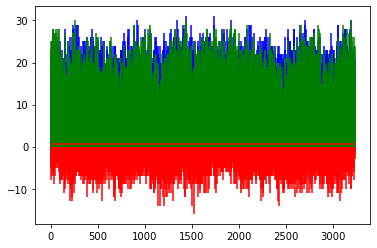

In [61]:
plot_spec(caleb_intersect, 'blue')
plot_spec(jesse_intersect, 'green')
plot_spec(-diff_intersect, 'red')
plot_line(0.7,len(intersection))

### first 150 (to improve visuals)

In [62]:
jesse_intersect = jesse_intersect.iloc[:,:150]
caleb_intersect = caleb_intersect.iloc[:,:150]
diff_intersect = diff_intersect.iloc[:,:150]

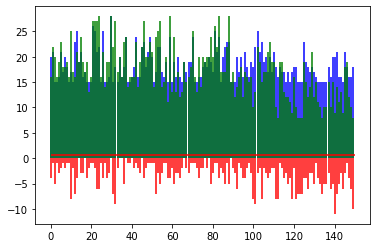

In [63]:
plot_spec(caleb_intersect, 'blue')
plot_spec(jesse_intersect, 'green')
plot_spec(-diff_intersect, 'red')
plot_line(0.7,150)

## Intersect between Jesse's data and Caleb's data (less than 0.7)

In [64]:
intersection = sorted(list(set(jesse_dict.keys()) & set(caleb_dict_low.keys())))
len(intersection)

0

In [65]:
jesse_intersect = pd.DataFrame([[jesse_dict[k] for k in intersection]])
caleb_intersect = pd.DataFrame([[caleb_dict_low[k] for k in intersection]])
diff_intersect = pd.DataFrame([[abs(caleb_dict_low[k]-jesse_dict[k]) for k in intersection]])
compare = pd.DataFrame([[caleb_dict_low[k] for k in intersection],[jesse_dict[k] for k in intersection],intersection])
compare

""
0
1
2


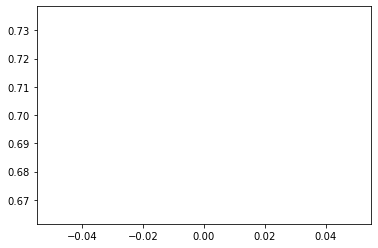

In [66]:
plot_spec(jesse_intersect, 'green')
plot_spec(caleb_intersect, 'blue')
plot_spec(-diff_intersect, 'red')
plot_line(0.7,len(intersection))

## Difference - Jesse's Data (no match in Caleb's 0.7 and higher data)

In [67]:
diff = sorted(list(set(jesse_dict.keys()) - set(caleb_dict_high.keys())))
print(len(diff))

3839


In [68]:
jesse_difference = pd.DataFrame([[jesse_dict[k] for k in diff],diff])
jesse_difference

0                   1                             2  \
0                  11                  12                            10   
1  (128, ANPFGGASHAK)  (129, ANPFGGASHAK)  (159, A+42.01057AAAAGTATSQR)   

                   3                  4                  5  \
0                 16                 13                 12   
1  (165, SIGVSNFNHR)  (168, LLLQVQHASK)  (169, DPQALSEHLK)   

                              6                             7  \
0                            17                            18   
1  (172, A+42.01057SGVAVSDGVIK)  (173, A+42.01057SGVAVSDGVIK)   

                    8                            9                  10  \
0                  13                           11                  10   
1  (176, FGLSVGHHLGK)  (193, A+42.01057TAEVLNIGKK)  (200, AVFPSIVGRPR)   

                   11                  12                   13  \
0                   9                   9                    9   
1  (205, VLQSFTVDSSK)  (206, VLQSFTVDSSK)  (217, MGLAISLVATEK)   

                                 14                                15  \
0                                 8                                 8   
1  (220, A+42.01057AAAAAAAAAGAAGGR)  (221, A+42.01057AAAAAAAAAGAAGGR)   

                            16                             17  \
0                           14                              9   
1  (221, A+42.01057EVQVLVLDGR)  (234, A+42.01057TTATMATSGSAR)   

                     18                  19                   20  \
0                    10                  16                   14   
1  (241, ALLTPVAIAAGRK)  (242, AFVDFLSDEIK)  (242, VTVLFAGQHIAK)   

                   21                    22                            23  \
0                  11                     9                            11   
1  (244, PMFIVNTNVPR)  (245, GAVGALLVYDIAK)  (251, A+42.01057SLSLAPVNIFK)   

                           24                          25  \
0                           8                          11   
1  (255, AVLFC+57.0215LSEDKK)  (256, FIC+57.0215TTSAIQNR)   

                      26                   27                   28  \
0                     13                   12                    8   
1  (257, VLQATVVAVGSGSK)  (260, SLDMDSIIAEVK)  (263, LLLLAGVDRLDK)   

                    29                     30                   31  \
0                    8                     14                    8   
1  (266, NPFLAAVTTNRK)  (270, GAVDGGLSIPHSTK)  (271, DGTYAVTYIPDK)   

                    32                   33                    34  \
0                    9                    8                    10   
1  (272, DGTYAVTYIPDK)  (275, AYVVLGQFLVLK)  (276, DAAIYLVTSLASK)   

                    35                   36                   37  \
0                   15                   18                    8   
1  (277, DSYVGDEAQSKR)  (278, DSYVGDEAQSKR)  (280, LLDSSTVTHLFK)   

                    38                     39                   40  \
0                   10                      9                   16   
1  (281, LLDSSTVTHLFK)  (285, ATIAGGGVIPHIHK)  (285, LLEMILNKPGLK)   

                      41                   42                  43  \
0                     12                    8                  11   
1  (286, ATIAGGGVIPHIHK)  (290, DSLTLVFVETKK)  (291, TLEEDEEELFK)   

                    44                    45                            46  \
0                   14                    12                            11   
1  (292, QLEMILNKPGLK)  (293, DLDVAILVGSMPR)  (296, ALAGC+57.0215DFLTISPK)   

                             47                              48  \
0                            12                              18   
1  (297, ALAGC+57.0215DFLTISPK)  (298, A+42.01057TTATMATSGSARK)   

                    49                   50                   51  \
0                   11                   10                   12   
1  (302, GISDLAQHYLMR)  (303, LALDIEIATYRK)  (303, YYVTIIDAPGHR)   

                      52                      53        

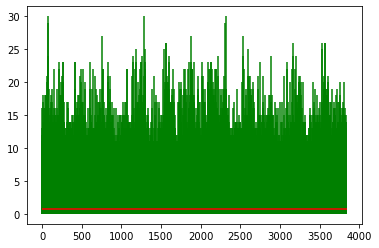

In [69]:
plot_spec(jesse_difference, 'green')
plot_line(0.7,len(diff))

### first 150 (to improve visuals)

In [70]:
jesse_diff_150 = jesse_difference.iloc[:,:150]

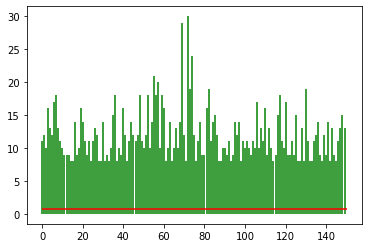

In [71]:
plot_spec(jesse_diff_150, 'green')
plot_line(0.7,150)

## Difference - Caleb's 0.7 or higher Data (no match in Jesse's)

In [72]:
diff = sorted(list(set(caleb_dict_high.keys()) - set(jesse_dict.keys())))
print(len(diff))

9615


In [73]:
caleb_difference = pd.DataFrame([[caleb_dict_high[k] for k in diff],diff])
caleb_difference

0                             1  \
0                                   15                            15   
1  (104, SC(UniMod:4)NC(UniMod:4)LLLK)  (256, AVLFC(UniMod:4)LSEDKK)   

                       2                     3                    4  \
0                     23                    17                   18   
1  (259, VLQATVVAVGSGSK)  (282, VGGTSDVEVNEKK)  (289, VTLTSEEEARLK)   

                                 5                               6  \
0                               18                              17   
1  (334, (UniMod:5)SDAAVDTSSEITTK)  (338, (UniMod:5)ASASYHISNLLEK)   

                                7                               8  \
0                              17                              18   
1  (346, LTDC(UniMod:4)VVMRDPASK)  (347, LTDC(UniMod:4)VVMRDPASK)   

                      9                   10                     11  \
0                    15                   15                     19   
1  (348, IIDSLFNTVTDKK)  (365, HLREYQDLLNVK)  (380, GRTVIIEQSWGSPK)   

                       12                        13                      14  \
0                      15                        16                      28   
1  (385, TIAIIAEGIPEALTR)  (401, NLTALGLNLVASGGTAK)  (404, ALTGHLEEVVLALLK)   

                      15                     16                      17  \
0                     19                     18                      21   
1  (415, GYSFTTTAEREIVR)  (416, GYSFTTTAEREIVR)  (416, SLADELALVDVLEDK)   

                                 18                      19  \
0                                15                      17   
1  (416, TIAEC(UniMod:4)LADELINAAK)  (421, VYNVTQHAVGIVVNK)   

                        20                     21                      22  \
0                       24                     16                      25   
1  (423, TFVNITPAEVGVLVGK)  (424, IFINNEWHDSVSGK)  (430, DLADELALVDVIEDK)   

                        23                      24  \
0                       17                      16   
1  (431, IINEPTAAAIAYGLDK)  (442, TTGFGMIYDSLDYAK)   

                                   25                                26  \
0                                  19                                18   
1  (443, AAVEEGIVLGGGC(UniMod:4)ALLR)  (455, LVQDVANNTNEEAGDGTTTATVLAR)   

                                 27                                28  \
0                                19                                20   
1  (457, LYSNAYLNDLAGC(UniMod:4)IK)  (458, LYSNAYLNDLAGC(UniMod:4)IK)   

                                           29  \
0                                          23   
1  (471, VIHDNFGIVEGLM(UniMod:35)TTVHAITATQK)   

                                           30                       31  \
0                                          20                       15   
1  (472, VIHDNFGIVEGLM(UniMod:35)TTVHAITATQK)  (474, RANNTFYGLSAGVFTK)   

                                 32                                  33  \
0                                15                                  19   
1  (476, LVEALC(UniMod:4)AEHQINLIK)  (485, AC(UniMod:4)ANPAAGSVILLENLR)   

                        34                       35  \
0                       15                       15   
1  (487, QFASQANVVGPWIQTK)  (488, QFASQANVVGPWIQTK)   

                                  36                                 37  \
0                                 19                                 16   
1  (489, GLGTDEDSLIEIIC(UniMod:4)SR)  (490, GLGTDEDSLIEIIC(UniMod:4)SR)   

                          38                                         39  \
0                         22                                         27   
1  (491, GADFLVTEVENGGSLGSK)  (493, LTGMAFRVPTANVSVVDLTC(UniMod:4)RLEK)   

                                          40                       41  \
0                                         25                       24   
1  (494, LTGMAFRVPTANVSVVDLTC(UniMod:4)RLEK)  (495, TITLEVEPSDTIENVK)   

                                    42     

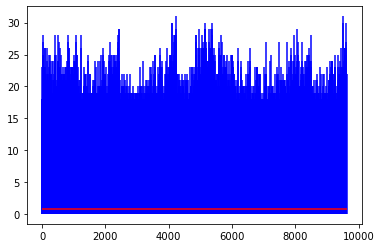

In [74]:
plot_spec(caleb_difference, 'blue')
plot_line(0.7,len(diff))

### first 150 (to improve visuals)

In [75]:
caleb_diff_150 = caleb_difference.iloc[:,:150]

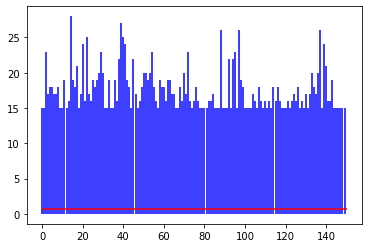

In [76]:
plot_spec(caleb_diff_150, 'blue')
plot_line(0.7,150)